In [ ]:
# Write a program to demonstrate the explore-exploit dilemma by implementing an epsilon-greedy
# algorithm for solving a multi-armed bandit problem. It should maintain estimates of action values and uses
# an exploration rate (epsilon) to balance exploration and exploitation.

# Name: A. N. Deshpande
# Class: B.E AIML
# Roll No: 43514

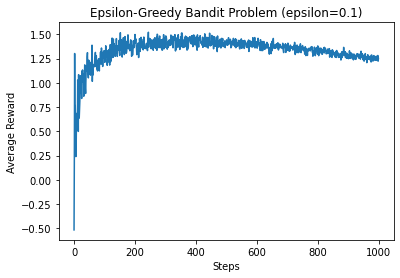

In [2]:
import numpy as np
import matplotlib.pyplot as plt

def epsilon_greedy(epsilon, num_actions, true_action_values, num_steps):
    action_values = np.zeros(num_actions)  # Estimated action values
    action_counts = np.zeros(num_actions)  # Counts of each action taken
    rewards = np.zeros(num_steps)  # Accumulated rewards over time

    for step in range(num_steps):
        if np.random.rand() < epsilon:
            # Exploration: Choose a random action
            action = np.random.choice(num_actions)
        else:
            # Exploitation: Choose the action with the highest estimated value
            action = np.argmax(action_values)

        # Get the reward for the chosen action (simulated as a normal distribution with the true action value)
        reward = np.random.normal(true_action_values[action], 1.0)

        # Update action values and counts
        action_counts[action] += 1
        action_values[action] += (reward - action_values[action]) / action_counts[action]

        # Store the reward for plotting
        rewards[step] = reward

    return rewards

def run_bandit_problem(epsilon, num_actions, true_action_values, num_steps, num_runs):
    average_rewards = np.zeros(num_steps)

    for _ in range(num_runs):
        rewards = epsilon_greedy(epsilon, num_actions, true_action_values, num_steps)
        average_rewards += (rewards - average_rewards) / (np.arange(num_steps) + 1)

    return average_rewards

if __name__ == "__main__":
    np.random.seed(42)

    # Problem setup
    num_actions = 10
    true_action_values = np.random.normal(0, 1, num_actions)  # True action values as a normal distribution
    epsilon = 0.1
    num_steps = 1000
    num_runs = 2000

    # Run epsilon-greedy algorithm
    average_rewards = run_bandit_problem(epsilon, num_actions, true_action_values, num_steps, num_runs)

    # Plot the results
    plt.plot(average_rewards)
    plt.title(f"Epsilon-Greedy Bandit Problem (epsilon={epsilon})")
    plt.xlabel("Steps")
    plt.ylabel("Average Reward")
    plt.show()
